# Homework 7 - M33_Orbit

Template - Rixin Li & G . Besla



In [1]:
# Homework 7
# Sanvi Khairnar

In [ ]:
 # Make edits where instructed - look for "****", which indicates where you need to add code. 

In [1]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np

# matplotlib provides powerful functions for plotting figures
import matplotlib.pyplot as plt

# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as const

# import Latex module so we can display the results with symbols
from IPython.display import Latex
%matplotlib inline

# my modules
# import CenterOfMass to determine the COM pos/vel of M33
from CenterOfMass2 import CenterOfMass
# **** import the GalaxyMass to determine the mass of M31 for each component
from GalaxyMass import ComponentMass

Position COM for MilkyWay is, [-2.07  2.95 -1.45] kpc
Velocity COM for MilkyWay is, [ 0.94  6.32 -1.35] km / s 

Position COM for MilkyWay is, [-377.66  611.43 -284.64] kpc
Velocity COM for MilkyWay is, [ 72.85 -72.14  49.  ] km / s 

Position COM for MilkyWay is, [-476.22  491.44 -412.4 ] kpc
Velocity COM for MilkyWay is, [ 44.42 101.78 142.23] km / s 

The seperation between MW and M31 is, 769.098 kpc
The relative velocity between MW and M31 is, 117.738 km / s
The seperation between M33 and M31 is, 201.083 kpc
The relative velocity between M33 and M31 is, 117.738 km / s
╒═══════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤═══════════╕
│ Galaxy name   │         Halo mass  │         Disk Mass  │        Bulge Mass  │        Total Mass  │   f_(bar) │
│               │    [10^{12} M_sun] │    [10^{12} M_sun] │    [10^{12} M_sun] │    [10^{12} M_sun] │           │
╞═══════════════╪════════════════════╪════════════════════╪════════════════════

# M33AnalyticOrbit

In [23]:
class M33AnalyticOrbit:
    """ Calculates the analytical orbit of M33 around M31 """
    
    def __init__(self, filename): 
        """ Creates the data file for orbit of M33 respective to M31
        
        PARAMETERS
        ----------
        filename: `string`
            filename for the output .txt file   
        
        """

        ### get the gravitational constant (the value is 4.498502151575286e-06)
        self.G = const.G.to(u.kpc**3/u.Msun/u.Gyr**2).value
        
        ### store the output file name
        self.filename = "%s"%(filename) + ".txt"
        
        ### get the current pos/vel of M33 
        # create an instance of the  CenterOfMass class for M33 
        M33_COM = CenterOfMass("M33_000.txt",2.0)
        
        # store the position VECTOR of the M33 COM (.value to get rid of units)
        M33_COM_P = M33_COM.COM_P(4, 0.1) # M33 will be highlt tidally drifted apart so VolDec = 4
        
        # store the velocity VECTOR of the M33 COM (.value to get rid of units)
        M33_COM_V = M33_COM.COM_V(M33_COM_P[0], M33_COM_P[1], M33_COM_P[2])
        
        ### get the current pos/vel of M31 
        # create an instance of the  CenterOfMass class for M31 
        M31_COM = CenterOfMass("M31_000.txt",2.0)
        
        # store the position VECTOR of the M31 COM (.value to get rid of units)
        M31_COM_P = M31_COM.COM_P(2, 0.1)
        
        # store the velocity VECTOR of the M31 COM (.value to get rid of units)
        M31_COM_V = M31_COM.COM_V(M31_COM_P[0], M31_COM_P[1], M31_COM_P[2])
        
        ### store the DIFFERENCE between the vectors posM33 - posM31
        # create two VECTORs self.r0 and self.v0 and have them be the
        # relative position and velocity VECTORS of M33
        self.r0 = M33_COM_P/u.kpc - M31_COM_P/u.kpc
        self.v0 = M33_COM_V/(u.km/u.s) - M31_COM_V/(u.km/u.s)
        
        ### get the mass of each component in M31 
        ### disk
        # self.rdisk = scale length (no units)
        self.rdisk = 5 
        # **** self.Mdisk set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        self.Mdisk = ComponentMass("M31_000.txt", 2.0)*1e12
        
        ### bulge
        # **** self.rbulge = set scale length (no units)
        self.rbulge = 1 
        # **** self.Mbulge  set with ComponentMass function. Remember to *1e12 to get the right units Use the right ptype
        self.Mbulge = ComponentMass("M31_000.txt", 3.0)*1e12
        
        # Halo
        # **** self.rhalo = set scale length from HW5 (no units)
        self.rhalo = 60
        # **** self.Mhalo set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        self.Mhalo = ComponentMass("M31_000.txt", 1.0)*1e12
    
    
    def HernquistAccel(self, M, r_a, r): # it is easiest if you take as an input the position VECTOR 
        """ Calculates the acceleration of either bulge or halo component of M33 (based on inputs given) using 
        Hernquist profile
        
        Inputs:
            M: 'float'
                total mass of particle type (bulge/halo)
            r_a: `float` 
                scale length for galaxy component
            r: `numpy array`
                position vector for COM of the galaxy component
        
        Outputs:
            Hern: `float`
                Hernquist profile acceleration of the galaxy component
        
        """
        
        ### **** Store the magnitude of the position vector
        rmag = np.sqrt(r[0]**2 + r[1]**2 + r[2]**2)
        
        ### *** Store the Acceleration
        Hern =  -((self.G*M)/(rmag *(r_a + rmag)**2)) * r  #follow the formula in the HW instructions
        # NOTE: we want an acceleration VECTOR so you need to make sure that in the Hernquist equation you 
        # use  -G*M/(rmag *(ra + rmag)**2) * r --> where the last r is a VECTOR 
        
        return Hern

    
    def MiyamotoNagaiAccel(self, M, r_d, r):# it is easiest if you take as an input a position VECTOR  r 
        """ Computes the disk acceleration of the galaxy
        
        Inputs:
            M: 'float'
                total mass of disk particles in the galaxy
            r_a: `float` 
                scale length for disk
            r: `numpy array`
                position vector for COM of the disk
        
        Outputs:
            a: `numpy array`
                disk acceleration vector
        
        """

        ### Acceleration **** follow the formula in the HW instructions
        # AGAIN note that we want a VECTOR to be returned  (see Hernquist instructions)
        # this can be tricky given that the z component is different than in the x or y directions. 
        # we can deal with this by multiplying the whole thing by an extra array that accounts for the 
        # differences in the z direction:
        #  multiply the whle thing by :   np.array([1,1,ZSTUFF]) 
        # where ZSTUFF are the terms associated with the z direction
        
        R = np.sqrt(r[0]**2 + r[1]**2)
        z_d = r_d/5.0
        B = r_d + np.sqrt(r[2]**2 + z_d**2)
        
        z_vector = np.array([1,1,B/(np.sqrt(r[2]**2 + z_d**2))]) 
        potential = -((self.G*M)/((R**2+B**2)**1.5))*r
        
        a = potential*z_vector # acceleartion vector from Miyamoto-Nagai 1975 profile
        
        return a
        # the np.array allows for a different value for the z component of the acceleration
    
    def M31Accel(self, r): # input should include the position vector, r
        """ Computes the total acceleartion of all galaxy components combined
        
        Inputs:
            r: `numpy array`
                position vector of galaxy COM
        Outputs:
            (a_bulge+a_disk+a_halo) : `numpy array`
                vector that has net acceleration of the galaxy
        
        """

        ### Call the previous functions for the halo, bulge and disk
        # **** these functions will take as inputs variable we defined in the initialization of the class like 
        # self.rdisk etc. 
        a_bulge = self.HernquistAccel(self.Mbulge, self.rbulge, r)  
        a_disk = self.MiyamotoNagaiAccel(self.Mdisk, self.rdisk, r)
        a_halo = self.HernquistAccel(self.Mhalo, self.rhalo, r)
            # return the SUM of the output of the acceleration functions - this will return a VECTOR 
        
        return (a_bulge+a_disk+a_halo)
    
    
    
    def LeapFrog(self, dt, r, v): # take as input r and v, which are VECTORS. Assume it is ONE vector at a time
        """ Finds the new position and velocity vectors for the galaxy during its orbit
        
        Inputs:
            dt: `float`
                time interval two snapshots
            r: `numpy array`
                postion vector
            v: `numpy array`
                velocity vector
        
        Outputs:
            rnew: `numpy array`
                new position vector for COM
            vnew: `numpy array`
                new velocity vector for COM
        
        """
        
        # predict the position at the next half timestep
        rhalf = r + v*dt/2
        
        # predict the final velocity at the next timestep using the acceleration field at the rhalf position 
        vnew = v + (self.M31Accel(rhalf))*dt
        
        # predict the final position using the average of the current velocity and the final velocity
        # this accounts for the fact that we don't know how the speed changes from the current timestep to the 
        # next, so we approximate it using the average expected speed over the time interval dt. 
        rnew = rhalf + vnew*dt/2
        
        return rnew, vnew # return the new position and velcoity vectors
    
    
    
    def OrbitIntegration(self, t0, dt, tmax):
        """ Determines the orbit of galaxy, by loooping through LeapFrog integrator and computing new postion and velocity 
        values and saves all the data of the galaxy orbit, (t, x, y, z, vx, vy, vz) as a .txt file
        
        Inputs:
            t0: `float`
                initial time
            dt: `float`
                time interval to jump over for loop
            tmax: `float`
                maximum time
        
        """

        # initialize the time to the input starting time
        t = t0
        
        # initialize an empty array of size :  rows int(tmax/dt)+2  , columns 7
        orbit = np.zeros((int(tmax/dt)+2, 7))
        
        # initialize the first row of the orbit
        orbit[0] = t0, *tuple(self.r0), *tuple(self.v0)
        # this above is equivalent to 
        # orbit[0] = t0, self.r0[0], self.r0[1], self.r0[2], self.v0[0], self.v0[1], self.v0[2]
        
        
        # initialize a counter for the orbit.  
        i = 1 # since we already set the 0th values, we start the counter at 1
        
        # start the integration (advancing in time steps and computing LeapFrog at each step)
        while (t <= tmax):  # as long as t has not exceeded the maximal time 
            
            # **** advance the time by one timestep, dt
            t += dt
           
            # **** store the new time in the first column of the ith row
            orbit[i, 0] = t 
            
            # ***** advance the position and velocity using the LeapFrog scheme
            # remember that LeapFrog returns a position vector and a velocity vector  
            # as an example, if a function returns three vectors you would call the function and store 
            # the variable like:     a,b,c = function(input)
            r = orbit[i-1, 1:4]
            v = orbit[i-1, 4:7]
            
            rnew, vnew = self.LeapFrog(dt, r, v)
         
    
            # ****  store the new position vector into the columns with indexes 1,2,3 of the ith row of orbit
            # TIP:  if you want columns 5-7 of the Nth row of an array called A, you would write : 
            # A[n, 5:8] 
            # where the syntax is row n, start at column 5 and end BEFORE column 8
            
            # ****  store the new position vector into the columns with indexes 1,2,3 of the ith row of orbit
            orbit[i, 1:7] = *tuple(rnew), *tuple(vnew)
            
            # **** update counter i , where i is keeping track of the number of rows (i.e. the number of time steps)
            i = i+1
        
        
        # write the data to a file
        np.savetxt(self.filename, orbit, fmt = "%11.3f"*7, comments='#', 
                   header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                   .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
        
        # there is no return function
        
        

In [24]:
#Generate .txt file with data for M33 orbit

t0 = 0 # Gyr
tmax = 10 # Gyr
dt = 0.1 # Gyr

M33Orbit = M33AnalyticOrbit("M33Orbit")
M33Orbit.OrbitIntegration(t0, dt, tmax)


## 5 Analysis
### 1]

In [25]:
# Read file for Analytical M33 Orbit wrt M31
orbit_data = np.genfromtxt("M33Orbit.txt", skip_header=1)

orb_time = orbit_data[:,0]

i=0
orb_pos = np.zeros([len(orb_time)])
while (i < len(orb_time)):
    orb_pos[i] = np.linalg.norm(orbit_data[i,1:4])
    i += 1
j=0
orb_vel = np.zeros([len(orb_time)])
while (j < len(orb_time)):
    orb_vel[j] = np.linalg.norm(orbit_data[j,4:7])
    j += 1

#-------code from assignment 6--------#
def VectorMagnitude(v1, v2):
    """  Function to determine the magnitude of difference between two vectors.
    This fuction can hence determine the realative positive or relative vellocities of
    two objects.
    
    Inputs:
        v1: `numpy array`
            array of x, y, z values for object 1
        v2: `numpy array`
            array of x, y, z values for object 2
    Outputs:
        relative_val: `float`
            magnitude of diffrence between the two vectors 
    """
    rel_x = np.abs(v1[0]-v2[0])
    rel_y = np.abs(v1[1]-v2[1])
    rel_z = np.abs(v1[2]-v2[2])
    
    return np.sqrt(rel_x**2 + rel_y**2 +rel_z**2)

# Read file for M33 and M31 COM data
M33_COMdata = np.genfromtxt("Orbit_M33_.txt", skip_header=1)
M31_COMdata = np.genfromtxt("Orbit_M31_.txt", skip_header=1)

time = M33_COMdata[:,0]

relpos_M33_M31 = np.zeros([len(M33_COMdata)])
relvel_M33_M31 = np.zeros([len(M33_COMdata)])
i=0
for v1, v2 in zip(M33_COMdata, M31_COMdata):
    M33_pos = v1[1:4] # position vector for M33
    M33_vel = v1[4:7] # velocity vector for M33
    M31_pos = v2[1:4] # position vector for M31
    M31_vel = v2[4:7] # velocity vector for M31
    
    relpos_M33_M31[i] = VectorMagnitude(M33_pos, M31_pos)
    relvel_M33_M31[i] = VectorMagnitude(M33_vel, M31_vel)
    i += 1

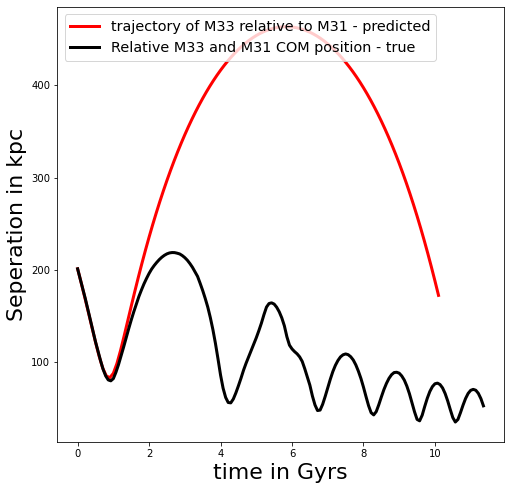

In [28]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)

plt.plot(orb_time, orb_pos, color = "red", linewidth = "3",
         label="trajectory of M33 relative to M31 - predicted")

plt.plot(time, relpos_M33_M31, color = "black", linewidth = "3",
         label="Relative M33 and M31 COM position - true")

# Add axis labels

plt.xlabel('time in Gyrs', fontsize=22)
plt.ylabel('Seperation in kpc', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')

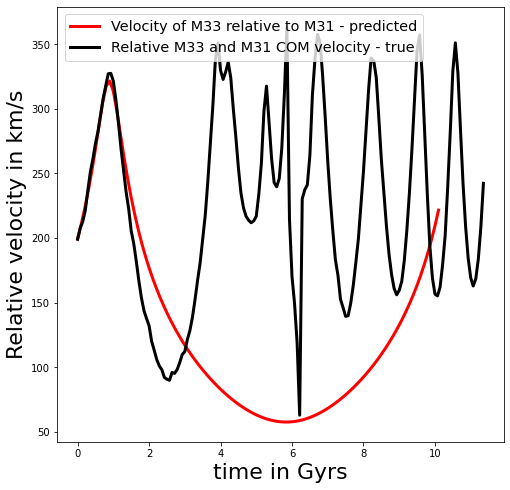

In [29]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)

plt.plot(orb_time, orb_vel, color = "red", linewidth = "3",
         label="Velocity of M33 relative to M31 - predicted")

plt.plot(time, relvel_M33_M31, color = "black", linewidth = "3",
         label="Relative M33 and M31 COM velocity - true")

# Add axis labels

plt.xlabel('time in Gyrs', fontsize=22)
plt.ylabel('Relative velocity in km/s', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')

### 2]
The predicted plots do not follow the trends depicted in the true plot, especially after 2 Gyrs. In both plots (seperation and relative velocity), the true plot has lot of ups and down. Statistically, thevariance for out predicted is plot if high especially in middle time between around 4 Gyrs-10Gyrs.

### 3]
In this python code we only focused on interaction between M33 and M31 however the event is between MW and M31, and we need to consider the graviation effects of MW on M33 too.

### 4]
By computing acceleration of MW and then computing new relative acceleration of M33 about the common COM of MW and M31, shall help in including the effects of MW to predict orbit of M33.